In [589]:
import sys
import pandas as pd
import numpy as np
import csv
import json
import typing
from itertools import repeat
from tqdm import tqdm
import networkx as nx
from copy import deepcopy
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

sys.path.append("/home/ionelia/pycharm-projects/grn-control")
from src.zoo_functions import plot_three_genes
from src.zoo_functions import create_plot_graph
from src.load_utils import load_grn_jax, topo_sort_graph_layers, get_basal_production_rate

gene_names_in_order = pd.read_csv("data-for-the-expert/15000G_D0_ipsc_norm.csv").columns
name_to_int = dict(zip(gene_names_in_order, range(len(gene_names_in_order))))
int_to_name = {int_id : name_id for name_id, int_id in name_to_int.items()}

In [ ]:
G = nx.DiGraph()
with open("graph_adjacencies.tsv", 'r') as f:
    rows = pd.read_csv(f, delimiter='\t')
    for row in tqdm(range(1, len(rows))): 
        row = rows.iloc[row]
        regulator_node_name, target_node_name, interaction_value = row['TF'], row['target'], row['importance'] 
        regulator_node_id, target_node_id = name_to_int[regulator_node_name], name_to_int[target_node_name]
        G.add_weighted_edges_from([(regulator_node_id, target_node_id, interaction_value)]) 

In [605]:
with open("graph_adjacencies.tsv", 'r') as f:
    rows = pd.read_csv(f, delimiter='\t')

In [4]:
nx.write_edgelist(G, "15kgenes.edgelist.gz", data=True)

In [597]:
G = nx.read_edgelist("15kgenes.edgelist.gz", create_using=nx.DiGraph)

In [3]:
tree = nx.dfs_tree(G)

In [63]:
bfs_tree = nx.bfs_tree(G, 3656)

In [4]:
layers = topo_sort_graph_layers(tree)
print(f"there are {len(layers)} layers in this graph, 1st layer has {len(layers[0])} genes")

there are 940 layers in this graph, 1st layer has 1 genes


In [39]:
tot_edges = 0
print("layer | num nodes in layer \n")
for idx, layer in enumerate(layers):
    for gene in layer:
        num_out_edges_gene = tree.out_edges([gene])
        tot_edges += len(num_out_edges_gene)
    print(f"{idx} => {len(layer)}")
print("tot_edges", tot_edges)    

layer | num nodes in layer 

0 => 1
1 => 12
2 => 19
3 => 11
4 => 1
5 => 7
6 => 17
7 => 27
8 => 3
9 => 78
10 => 7
11 => 15
12 => 12
13 => 6
14 => 7
15 => 14
16 => 7
17 => 8
18 => 26
19 => 2
20 => 14
21 => 9
22 => 7
23 => 26
24 => 9
25 => 13
26 => 21
27 => 15
28 => 19
29 => 1
30 => 3
31 => 9
32 => 4
33 => 1
34 => 4
35 => 1
36 => 1
37 => 1
38 => 1
39 => 1
40 => 1
41 => 8
42 => 1
43 => 1
44 => 2
45 => 3
46 => 42
47 => 29
48 => 11
49 => 14
50 => 3
51 => 9
52 => 3
53 => 13
54 => 12
55 => 55
56 => 1
57 => 24
58 => 2
59 => 10
60 => 1
61 => 9
62 => 13
63 => 3
64 => 1
65 => 2
66 => 10
67 => 7
68 => 4
69 => 16
70 => 11
71 => 18
72 => 18
73 => 5
74 => 17
75 => 23
76 => 18
77 => 1
78 => 9
79 => 13
80 => 1
81 => 1
82 => 6
83 => 9
84 => 2
85 => 1
86 => 16
87 => 43
88 => 6
89 => 12
90 => 25
91 => 26
92 => 25
93 => 22
94 => 17
95 => 43
96 => 52
97 => 36
98 => 54
99 => 1
100 => 9
101 => 9
102 => 5
103 => 15
104 => 12
105 => 16
106 => 2
107 => 18
108 => 2
109 => 1
110 => 4
111 => 30
112 => 43
113 => 3
11

In [8]:
tree.out_edges([3656])

OutEdgeDataView([(3656, 13627), (3656, 5467), (3656, 5970), (3656, 14661), (3656, 338), (3656, 6564), (3656, 2609), (3656, 11238), (3656, 9453), (3656, 7954), (3656, 7132), (3656, 3657)])

In [15]:
f = open("graph_adjacencies.tsv", 'r') 
rows = pd.read_csv(f, delimiter='\t')

In [16]:
rows

,TF,target,importance
0,Cdkn2a,Tmem176b,1.407907e+02
1,Cdkn2a,Cdkn1a,1.384895e+02
2,Cdkn2a,Tmem176a,1.361241e+02
3,Irf7,Ccl5,1.353614e+02
4,Cdkn2a,Mgst1,1.331926e+02
...,...,...,...
3276579,Sertad2,Slc2a4,9.561474e-22
3276580,Fus,Asprv1,7.507603e-22
3276581,Khdrbs1,Hspa1b,7.409465e-22
3276582,Rbbp7,Lrrc3,5.893662e-22


In [20]:
rows.loc[rows['TF']==int_to_name[3656]]

,TF,target,importance
0,Cdkn2a,Tmem176b,1.407907e+02
1,Cdkn2a,Cdkn1a,1.384895e+02
2,Cdkn2a,Tmem176a,1.361241e+02
4,Cdkn2a,Mgst1,1.331926e+02
5,Cdkn2a,Fth1,1.317469e+02
...,...,...,...
3275972,Cdkn2a,Cilp2,4.920493e-20
3276007,Cdkn2a,Chrne,4.706280e-20
3276062,Cdkn2a,Cacnb2,4.229133e-20
3276152,Cdkn2a,Nr1i2,3.609283e-20


In [51]:
all_genes_allowed_in_graph = [gene for gene in layer for layer in layers[:5]]
print(len(all_genes_allowed_in_graph))

185


In [61]:
def convert_tree_to_interactions_file(all_genes, trim_tree=3):
    interactions = {}
    
    def add_new_edge(tf, target, interactions):
        row_with_importance = rows.loc[rows['TF']==tf].loc[rows['target']==target]
        weight = row_with_importance['importance'].item()
        assert len(row_with_importance) == 1, print("Error, Ouch!")

        if not interactions[gene]:
            interactions[gene]['targets'] = []
            interactions[gene]['weights'] = []
        else:
            interactions[gene]['targets'].append(target)
            interactions[gene]['weights'].append(weight)
        return interactions    

    for layer in tqdm(layers[:trim_tree]):
        for gene in layer:
            edges = tree.out_edges(gene)
            if edges is not None:
                interactions[gene] = {}

                for edge in edges:
                    tf, target = int_to_name[edge[0]], int_to_name[edge[1]]
                    
                    if trim_tree is not None:
                        if target in all_genes:
                            interactions = add_new_edge(tf, target)
                    else:
                        interactions = add_new_edge(tf, target)
                        
    return interactions


interactions = convert_tree_to_interactions_file(all_genes_allowed_in_graph, trim_tree=2)
with open('interactions_dict', 'w') as outfile:
    json.dump({'interactions': interactions}, outfile)      

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1987.35it/s]

(3656,)
[(3656, 13627), (3656, 5467), (3656, 5970), (3656, 14661), (3656, 338), (3656, 6564), (3656, 2609), (3656, 11238), (3656, 9453), (3656, 7954), (3656, 7132), (3656, 3657)]
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
{3656: {}}
(13627, 5467, 5970, 14661, 338, 6564, 2609, 11238, 9453, 7954, 7132, 3657)
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[(3657, 570), (3657, 9114), (3657, 6402), (3657, 5466), (3657, 10303), (3657, 1144), (3657, 12313), (3657, 6985), (3657, 5572), (3657, 5963), (3657, 1898), (3657, 11360), (3657, 8107), (3657, 6276), (3657, 7788), (3657, 12521), (3657, 961), (3657, 13175), (3657, 8373)]
{3656: {}, 13627: {}, 5467: {}, 5970: {}, 14661: {}, 338: {}, 6564: {}, 2609: {}, 11238: {}, 9453: {}, 7954: {}, 7132: {}, 3657: {}}
{3656: {}, 13627: {}, 5467: {}, 5970: {}, 1466

In [57]:
interactions

{3656: {},
 13627: {},
 5467: {},
 5970: {},
 14661: {},
 338: {},
 6564: {},
 2609: {},
 11238: {},
 9453: {},
 7954: {},
 7132: {},
 3657: {},
 570: {},
 9114: {},
 6402: {},
 5466: {},
 10303: {},
 1144: {},
 12313: {},
 6985: {},
 5572: {},
 5963: {},
 1898: {},
 11360: {},
 8107: {},
 6276: {},
 7788: {},
 12521: {},
 961: {},
 13175: {},
 8373: {},
 13654: {},
 14735: {},
 5016: {},
 6195: {},
 2727: {},
 2104: {},
 10203: {},
 1963: {},
 10545: {},
 8123: {},
 13318: {},
 535: {}}

In [ ]:
### Breadth first search

In [67]:
bfs_tree = nx.bfs_tree(G, 3656)
layers = topo_sort_graph_layers(bfs_tree)
print(f"there are {len(layers)} layers in this graph, 1st layer has {len(layers[0])} genes")

there are 3 layers in this graph, 1st layer has 1 genes


In [68]:
tot_edges = 0
print("layer | num nodes in layer \n")
for idx, layer in enumerate(layers):
    for gene in layer:
        num_out_edges_gene = tree.out_edges([gene])
        tot_edges += len(num_out_edges_gene)
    print(f"{idx} => {len(layer)}")
print("tot_edges", tot_edges)   

layer | num nodes in layer 

0 => 1
1 => 7317
2 => 7680
tot_edges 14997


In [102]:
max_grade = max(graph.degree, key=lambda x: x[1])[1]
max_grade_nodes_list = [node[0] for node in graph.degree if node[1] == max_grade]

In [103]:
max_grade_nodes_list

['7858']

In [108]:
min_grade = min(graph.degree, key=lambda x: x[1])[1]
min_grade_nodes_list = [node[0] for node in graph.degree if node[1] == min_grade]
min_grade_nodes_list

['9976']

In [110]:
bfs_tree = nx.bfs_tree(G, 9976)
layers = topo_sort_graph_layers(bfs_tree)
print(f"there are {len(layers)} layers in this graph, 1st layer has {len(layers[0])} genes")

there are 1 layers in this graph, 1st layer has 1 genes


In [138]:
for degree in range(100):
    out = list(((node, len(G.out_edges(node))) for node, in_degree in G.in_degree() if in_degree == degree and len(G.out_edges(node))>0))
    print(degree, out)

0 []
1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 []
11 []
12 []
13 []
14 []
15 []
16 []
17 []
18 []
19 []
20 []
21 []
22 []
23 []
24 []
25 []
26 []
27 []
28 []
29 []
30 []
31 []
32 []
33 []
34 []
35 []
36 []
37 [(10165, 3192), (5449, 3189)]
38 [(10939, 2481), (12648, 2617)]
39 []
40 [(8308, 2750)]
41 [(2023, 2914), (7867, 3054)]
42 [(11189, 2883), (12611, 2865)]
43 [(12190, 2229)]
44 [(723, 2947), (3973, 3228)]
45 [(1935, 2335), (5353, 1915), (2050, 2112)]
46 [(832, 2990), (6717, 2160), (14929, 2721), (13449, 2302), (10144, 1940), (3597, 2200), (14111, 2824)]
47 [(3841, 2389), (4243, 3284), (1033, 2738), (7757, 2386), (6201, 2284), (1109, 3096)]
48 [(8111, 1328), (13582, 2592), (11389, 3162), (5450, 2661), (2495, 2736)]
49 [(3078, 2594), (4289, 2165), (1794, 2319)]
50 [(8550, 2911), (8563, 1935), (13592, 2417)]
51 [(7233, 3219), (7262, 2261), (3546, 2573), (6345, 1849), (2632, 1656), (5496, 2577), (13448, 1806), (3552, 1502), (11761, 3669), (2407, 2521)]
52 [(12907, 1767), (298, 28

In [121]:
# list((node for node, in_degree in G.in_degree() if in_degree == 2))

min_grade = min(G.in_degree, key=lambda x: x[1])
min_grade

(9976, 32)

In [128]:
G.in_edges(9976)

InEdgeDataView([(14100, 9976), (6596, 9976), (489, 9976), (12892, 9976), (4396, 9976), (5297, 9976), (1058, 9976), (712, 9976), (5682, 9976), (7262, 9976), (10851, 9976), (837, 9976), (1859, 9976), (33, 9976), (14246, 9976), (535, 9976), (6977, 9976), (10210, 9976), (9557, 9976), (11396, 9976), (12637, 9976), (10321, 9976), (7867, 9976), (7357, 9976), (2550, 9976), (2593, 9976), (14243, 9976), (6396, 9976), (14637, 9976), (12842, 9976), (12263, 9976), (3717, 9976)])

In [143]:
bfs_tree = nx.bfs_tree(G, 547)
layers = topo_sort_graph_layers(bfs_tree)
print(f"there are {len(layers)} layers in this graph, 1st layer has {len(layers[0])} genes")

there are 4 layers in this graph, 1st layer has 1 genes


In [144]:
tot_edges = 0
print("layer | num nodes in layer \n")
for idx, layer in enumerate(layers):
    for gene in layer:
        num_out_edges_gene = tree.out_edges([gene])
        tot_edges += len(num_out_edges_gene)
    print(f"{idx} => {len(layer)}")
print("tot_edges", tot_edges)   

layer | num nodes in layer 

0 => 1
1 => 674
2 => 12945
3 => 1378
tot_edges 14997


In [162]:
for degree in range(100):
    for node, out_degree in G.in_degree():
        selected = []
        if out_degree == degree:
            if G.out_degree(node)>0:
                selected.append((node, out_degree))
    print(degree, selected)

0 []
1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 []
11 []
12 []
13 []
14 []
15 []
16 []
17 []
18 []
19 []
20 []
21 []
22 []
23 []
24 []
25 []
26 []
27 []
28 []
29 []
30 []
31 []
32 []
33 []
34 []
35 []
36 []
37 []
38 []
39 []
40 []
41 []
42 []
43 []
44 []
45 []
46 []
47 []
48 []
49 []
50 []
51 []
52 []
53 []
54 []
55 []
56 []
57 []
58 []
59 []
60 []
61 []
62 []
63 []
64 []
65 []
66 []
67 []
68 []
69 []
70 []
71 []
72 []
73 []
74 []
75 []
76 []
77 []
78 []
79 []
80 []
81 []
82 []
83 []
84 []
85 []
86 []
87 []
88 []
89 []
90 []
91 []
92 []
93 []
94 []
95 []
96 []
97 []
98 []
99 []


In [153]:
G.nodes(9976).out_edges()

AttributeError: 'NodeDataView' object has no attribute 'out_edges'

In [167]:
for degree in range(100):
    out = list(((node, G.out_degree(node)) for node, in_degree in G.in_degree() if in_degree == degree and G.out_degree(node)>0))
    if out:
        print(degree, out)

37 [(10165, 3192), (5449, 3189)]
38 [(10939, 2481), (12648, 2617)]
40 [(8308, 2750)]
41 [(2023, 2914), (7867, 3054)]
42 [(11189, 2883), (12611, 2865)]
43 [(12190, 2229)]
44 [(723, 2947), (3973, 3228)]
45 [(1935, 2335), (5353, 1915), (2050, 2112)]
46 [(832, 2990), (6717, 2160), (14929, 2721), (13449, 2302), (10144, 1940), (3597, 2200), (14111, 2824)]
47 [(3841, 2389), (4243, 3284), (1033, 2738), (7757, 2386), (6201, 2284), (1109, 3096)]
48 [(8111, 1328), (13582, 2592), (11389, 3162), (5450, 2661), (2495, 2736)]
49 [(3078, 2594), (4289, 2165), (1794, 2319)]
50 [(8550, 2911), (8563, 1935), (13592, 2417)]
51 [(7233, 3219), (7262, 2261), (3546, 2573), (6345, 1849), (2632, 1656), (5496, 2577), (13448, 1806), (3552, 1502), (11761, 3669), (2407, 2521)]
52 [(12907, 1767), (298, 2849), (8192, 3318), (5455, 1626), (2119, 3342), (12883, 2831)]
53 [(10456, 2841), (14141, 2472), (12044, 3115), (14473, 2693), (13608, 3212), (13965, 2648), (3727, 1652), (12881, 3248), (869, 1739), (13353, 3616), (8494

In [175]:
for e in G.edges(547, data=True):
    print(e[2])

{'weight': 13.08391127260662}
{'weight': 8.086924880134928}
{'weight': 7.907927988796838}
{'weight': 7.352563076169791}
{'weight': 7.090399751484243}
{'weight': 6.752699939347703}
{'weight': 6.655583140400587}
{'weight': 6.209212548385104}
{'weight': 5.943186055942772}
{'weight': 5.880514068299049}
{'weight': 5.093930771251553}
{'weight': 4.729718816683405}
{'weight': 4.323226580092287}
{'weight': 4.262225587049576}
{'weight': 4.099418427260519}
{'weight': 4.045323233769131}
{'weight': 4.017326851711844}
{'weight': 3.929737926965483}
{'weight': 3.925922845187425}
{'weight': 3.897931920537847}
{'weight': 3.869554060710714}
{'weight': 3.719974173539892}
{'weight': 3.700439256562669}
{'weight': 3.6858187474500577}
{'weight': 3.605029321931552}
{'weight': 3.480635739400799}
{'weight': 3.4754336034972204}
{'weight': 3.3626512785696554}
{'weight': 3.243763101639765}
{'weight': 3.240948605082984}
{'weight': 3.0852491219598}
{'weight': 3.060974195251079}
{'weight': 3.0565700411426504}
{'weight

In [189]:
"total edges:", len(list(e for e in G.edges()))

('total edges:', 3276583)

# Solution v9: take out edges by weight thresold

#### Let's look at the weights (k) frequency

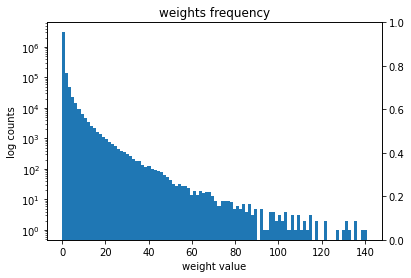

In [363]:
series = rows['importance']
fig, ax = plt.subplots()
ax2 = ax.twinx()
n, bins, patches = ax.hist(series, bins=100, log=True)
ax.set_xlabel("weight value")
ax.set_ylabel("log counts")
plt.title("weights frequency")
plt.savefig('test.png')

It's left skewed, there are a lot of edges with a very small value.

In [501]:
list(e for e in G.edges.data('weight'))

[(0, 1, None),
 (0, 3, None),
 (0, 6, None),
 (0, 7, None),
 (0, 14, None),
 (0, 15, None),
 (0, 16, None),
 (0, 19, None),
 (0, 22, None),
 (0, 25, None),
 (0, 26, None),
 (0, 29, None),
 (0, 32, None),
 (0, 33, None),
 (0, 34, None),
 (0, 35, None),
 (0, 36, None),
 (0, 37, None),
 (0, 38, None),
 (0, 39, None),
 (0, 40, None),
 (0, 41, None),
 (0, 42, None),
 (0, 46, None),
 (0, 52, None),
 (0, 55, None),
 (0, 57, None),
 (0, 58, None),
 (0, 59, None),
 (0, 60, None),
 (0, 61, None),
 (0, 64, None),
 (0, 66, None),
 (0, 67, None),
 (0, 69, None),
 (0, 72, None),
 (0, 73, None),
 (0, 74, None),
 (0, 77, None),
 (0, 79, None),
 (0, 80, None),
 (0, 82, None),
 (0, 83, None),
 (0, 84, None),
 (0, 86, None),
 (0, 87, None),
 (0, 88, None),
 (0, 91, None),
 (0, 93, None),
 (0, 96, None),
 (0, 97, None),
 (0, 99, None),
 (0, 101, None),
 (0, 102, None),
 (0, 103, None),
 (0, 107, None),
 (0, 108, None),
 (0, 109, None),
 (0, 110, None),
 (0, 114, None),
 (0, 116, None),
 (0, 119, None),
 (

In [561]:
threshold = 0.1

# filter out all edges below threshold and grab id's
long_edges = list(filter(lambda e: e[2] < threshold, (e for e in G.edges.data('weight'))))
le_ids = list(e[:2] for e in long_edges)
print("removing #edges...", len(le_ids))

removing #edges... 1068506


In [562]:
tiny_graph = deepcopy(G)

In [563]:
# remove filtered edges from graph G
tiny_graph.remove_edges_from(le_ids)

In [517]:
print("in_degree_node, (node_id, out_degree_node)\n")
for degree in range(100):
    out = list(((node, tiny_graph.out_degree(node)) for node, in_degree in tiny_graph.in_degree() if in_degree == degree and tiny_graph.out_degree(node)>0))
    if out:
        print(degree, out)   

in_degree_node, (node_id, out_degree_node)

33 [(10165, 1966), (5449, 2106)]
35 [(6201, 1481), (12648, 1692)]
37 [(8111, 971), (10734, 432), (7757, 1518)]
38 [(8308, 1817), (9346, 923), (10939, 1605), (2407, 1495)]
39 [(7867, 2046), (11189, 1843), (6717, 1377), (6091, 549), (12611, 1790), (2495, 1697)]
40 [(2023, 1912), (5353, 1224), (4243, 2097), (2050, 1369), (3727, 1055), (3973, 1933), (13500, 511)]
41 [(7112, 370), (13723, 776), (11145, 392), (12888, 919), (7556, 2049), (2632, 1025), (1776, 1618), (13448, 1151), (14111, 1680)]
42 [(832, 1926), (12190, 1360), (7847, 2604), (3841, 1476), (14929, 1648), (383, 617), (13582, 1639), (13895, 1136), (13449, 1394), (869, 1114), (8494, 1487), (192, 1064), (10144, 1229), (3597, 1386)]
43 [(7233, 2117), (12907, 1173), (12229, 484), (3546, 1657), (6105, 2292), (1033, 1751), (1197, 1466), (13353, 2248), (5450, 1776), (8880, 895)]
44 [(8550, 1889), (14742, 654), (14473, 1737), (723, 1837), (1753, 649), (5481, 770), (1935, 1519), (14593, 2419), (1

In [514]:
out.sort(key=lambda x:x[1], reverse=True)

In [515]:
out

[]

In [519]:
tiny_bfs = nx.bfs_tree(tiny_graph, 10734)

layers = topo_sort_graph_layers(tiny_bfs)
print(f"there are {len(layers)} layers in this graph, 1st layer has {len(layers[0])} genes")

tot_edges = 0
tot_genes = 0
print("layer | num nodes in layer \n")
for idx, layer in enumerate(layers):
    for gene in layer:
        num_out_edges_gene = tree.out_edges([gene])
        tot_edges += len(num_out_edges_gene)
        tot_genes += 1
    print(f"{idx} => {len(layer)}")
print("tot_edges", tot_edges, "\n tot genes", tot_genes) 

there are 4 layers in this graph, 1st layer has 1 genes
layer | num nodes in layer 

0 => 1
1 => 432
2 => 13244
3 => 1321
tot_edges 14997 
 tot genes 14998


In [448]:
for i in range(len(out)):
    tiny_bfs = nx.bfs_tree(tiny_graph, out[i][0])
    print(i)
    
    layers = topo_sort_graph_layers(tiny_bfs)
    print(f"there are {len(layers)} layers in this graph, 1st layer has {len(layers[0])} genes")

    tot_edges = 0
    tot_genes = 0
    print("layer | num nodes in layer \n")
    for idx, layer in enumerate(layers):
        for gene in layer:
            num_out_edges_gene = tree.out_edges([gene])
            tot_edges += len(num_out_edges_gene)
            tot_genes += 1
        # print(f"{idx} => {len(layer)}")
    print("tot_edges", tot_edges, "\n tot genes", tot_genes) 
    print("-----------------------------------------------------")

0
there are 2 layers in this graph, 1st layer has 1 genes
layer | num nodes in layer 

tot_edges 14 
 tot genes 35
-----------------------------------------------------
1
there are 11 layers in this graph, 1st layer has 1 genes
layer | num nodes in layer 

tot_edges 4329 
 tot genes 4185
-----------------------------------------------------
2
there are 2 layers in this graph, 1st layer has 1 genes
layer | num nodes in layer 

tot_edges 9 
 tot genes 13
-----------------------------------------------------
3
there are 2 layers in this graph, 1st layer has 1 genes
layer | num nodes in layer 

tot_edges 23 
 tot genes 12
-----------------------------------------------------
4
there are 2 layers in this graph, 1st layer has 1 genes
layer | num nodes in layer 

tot_edges 17 
 tot genes 10
-----------------------------------------------------
5
there are 2 layers in this graph, 1st layer has 1 genes
layer | num nodes in layer 

tot_edges 43 
 tot genes 9
-------------------------------------

### Example of graph with DFS
- problem very sparse and long graph

In [469]:
tiny_dfs = nx.dfs_tree(tiny_graph, out[8][0])

layers = topo_sort_graph_layers(tiny_dfs)
print(f"there are {len(layers)} layers in this graph, 1st layer has {len(layers[0])} genes")

tot_edges = 0
print("layer | num nodes in layer \n")
for idx, layer in enumerate(layers):
    for gene in layer:
        num_out_edges_gene = tree.out_edges([gene])
        tot_edges += len(num_out_edges_gene)
    print(f"{idx} => {len(layer)}")
print("tot_edges", tot_edges) 

there are 4 layers in this graph, 1st layer has 1 genes
layer | num nodes in layer 

0 => 1
1 => 2
2 => 34
3 => 6
tot_edges 44


In [450]:
tiny_bfs.edges

OutEdgeView([(1218, 10324), (1218, 7145), (1218, 5846), (1218, 4854), (1218, 14791), (1218, 10711), (1218, 14789), (7145, 4311), (7145, 8225), (7145, 3326), (7145, 13717), (7145, 13100), (7145, 4690), (7145, 10558), (7145, 14790), (7145, 163), (7145, 10232), (7145, 3295), (7145, 10967), (7145, 772), (7145, 10667), (7145, 8481), (7145, 12520), (7145, 646), (7145, 7132), (7145, 3293), (7145, 1361), (7145, 10236), (7145, 11183), (7145, 3292), (7145, 12581), (7145, 13800), (7145, 6647), (7145, 9743), (7145, 111), (7145, 774), (7145, 3294), (7145, 4926), (7145, 13716), (7145, 11198), (7145, 1987), (7145, 5414)])

In [ ]:
interactions = {}

def add_new_edge(tf, target, interactions):
    row_with_importance = rows.loc[rows['TF']==tf].loc[rows['target']==target]
    weight = row_with_importance['importance'].item()
    assert len(row_with_importance) == 1, print("Error, Ouch!")

    if not interactions[gene]:
        interactions[gene]['targets'] = []
        interactions[gene]['weights'] = []
    else:
        interactions[gene]['targets'].append(target)
        interactions[gene]['weights'].append(weight)
    return interactions    

gene_to_exclude = layers[0][0]
print(gene_to_exclude)

for layer in tqdm(layers[1:]):
    for gene in layer:
        edges = tree.out_edges(gene)
        
        if edges is not None:
            interactions[gene] = {}

            for edge in edges:
                tf, target = int_to_name[edge[0]], int_to_name[edge[1]]

                if trim_tree is not None:
                    if target in all_genes:
                        interactions = add_new_edge(tf, target)
                else:
                    interactions = add_new_edge(tf, target)

return interactions

In [465]:
layers[0]

(1218,)

In [464]:
layers[1]

(10324, 7145, 5846, 4854, 14791, 10711, 14789)

In [486]:
interactions = {}
for edge in tiny_bfs.edges:
    regulator, target = edge
    
    if regulator == layers[0][0]:
        continue
    
    try:
        interactions[target].append(regulator)
    except KeyError:
        interactions[target] = []
        interactions[target].append(regulator)

In [487]:
masters = tiny_bfs.nodes() - interactions.keys()
masters

{279,
 489,
 1131,
 1199,
 1860,
 2318,
 2953,
 3095,
 3787,
 3832,
 5245,
 5575,
 5584,
 5800,
 6224,
 6515,
 6909,
 7858,
 7881,
 8210,
 8634,
 8715,
 9564,
 9978,
 9993,
 10083,
 10921,
 11094,
 11696,
 11889,
 12183,
 12646,
 12872,
 14335,
 14424,
 14920,
 14980,
 14981,
 14982,
 14987,
 14988,
 14990}

In [520]:
for gene in layers[2]:
    print(gene, tiny_bfs.in_edges(gene))

2631 [(11549, 2631)]
2878 [(11549, 2878)]
4669 [(11549, 4669)]
4670 [(11549, 4670)]
2809 [(11549, 2809)]
133 [(11549, 133)]
5497 [(11549, 5497)]
11576 [(11549, 11576)]
8981 [(11549, 8981)]
7066 [(11549, 7066)]
2865 [(11549, 2865)]
12555 [(11549, 12555)]
4710 [(11549, 4710)]
12520 [(11549, 12520)]
1350 [(11549, 1350)]
11801 [(11549, 11801)]
13547 [(11549, 13547)]
12891 [(11549, 12891)]
588 [(11549, 588)]
12521 [(11549, 12521)]
5965 [(11549, 5965)]
8819 [(11549, 8819)]
10690 [(11549, 10690)]
1158 [(11549, 1158)]
393 [(11549, 393)]
519 [(11549, 519)]
4673 [(11549, 4673)]
11829 [(11549, 11829)]
13195 [(11549, 13195)]
1125 [(11549, 1125)]
4690 [(11549, 4690)]
3634 [(11549, 3634)]
8854 [(11549, 8854)]
3915 [(11549, 3915)]
10846 [(11549, 10846)]
5498 [(11549, 5498)]
6440 [(11549, 6440)]
7800 [(11549, 7800)]
8116 [(11549, 8116)]
13829 [(11549, 13829)]
5917 [(11549, 5917)]
1768 [(11549, 1768)]
5950 [(11549, 5950)]
11493 [(11549, 11493)]
10496 [(11549, 10496)]
11993 [(11549, 11993)]
9377 [(11549

### Solution #100: strongly connected componetnts

In [586]:
for i in range(10_000):
    bad_boys = list(nx.strongly_connected_components(G))
    print(i)
    for boy in bad_boys:
        boy = list(boy)
        if len(boy) > 1:
            print(len(boy))
            path = next(nx.all_simple_paths(G, boy[0], boy[1]))
            G.remove_edge(*path[:2])
            break

0
967
1
967
2
967
3
967
4
967
5
967
6
967
7
967
8
967
9
967
10
967
11
967
12
967
13
967
14
967
15
967
16
967
17
967
18
967
19
967
20
967
21
967
22
967
23
967
24
967
25
967
26
967
27
967
28
967
29
967
30
967
31
967
32
967
33
967
34
967
35
967
36
967
37
967
38
967
39
967
40
967
41
967
42
967
43
967
44
967
45
967
46
967
47
967
48
967
49
967
50
967
51
967
52
967
53
967
54
967
55
967
56
967
57
967
58
967
59
967


KeyboardInterrupt: 

In [598]:
SCC = list(nx.strongly_connected_components(G))
len([i for i in SCC if len(i)>1])

1

In [599]:
largest = max(nx.strongly_connected_components(G), key=len)
len(largest), largest

(967,
 {'10004',
  '10013',
  '10021',
  '10039',
  '10065',
  '10073',
  '10084',
  '10111',
  '10114',
  '10122',
  '10127',
  '10130',
  '10144',
  '10146',
  '10162',
  '10165',
  '10185',
  '10210',
  '10212',
  '10214',
  '1023',
  '10249',
  '10253',
  '10257',
  '10258',
  '10259',
  '10260',
  '10261',
  '10280',
  '10292',
  '10296',
  '10319',
  '10321',
  '1033',
  '10332',
  '10333',
  '10361',
  '10363',
  '1038',
  '10403',
  '10411',
  '10424',
  '10434',
  '10456',
  '10457',
  '10475',
  '10479',
  '10486',
  '10518',
  '10562',
  '10566',
  '1058',
  '10586',
  '10591',
  '10637',
  '10685',
  '1069',
  '10732',
  '10734',
  '10793',
  '10812',
  '10835',
  '10837',
  '10838',
  '10839',
  '10841',
  '10842',
  '10843',
  '10844',
  '10846',
  '10851',
  '10856',
  '10861',
  '10870',
  '10889',
  '10900',
  '10901',
  '10907',
  '10911',
  '10938',
  '10939',
  '10940',
  '10952',
  '10970',
  '10976',
  '10977',
  '10985',
  '10990',
  '11047',
  '11065',
  '11078'

In [602]:
scc_edges = G.edges(list(largest))

In [604]:
print("edges in the strongly connected component:",len(scc_edges))

edges in the storngly connected component 3276583


In [ ]:
G.edge_subgraph(list(largest))

# check for self-loops

In [609]:
rows

,TF,target,importance
0,Cdkn2a,Tmem176b,1.407907e+02
1,Cdkn2a,Cdkn1a,1.384895e+02
2,Cdkn2a,Tmem176a,1.361241e+02
3,Irf7,Ccl5,1.353614e+02
4,Cdkn2a,Mgst1,1.331926e+02
...,...,...,...
3276579,Sertad2,Slc2a4,9.561474e-22
3276580,Fus,Asprv1,7.507603e-22
3276581,Khdrbs1,Hspa1b,7.409465e-22
3276582,Rbbp7,Lrrc3,5.893662e-22


In [632]:
list(rows.loc[0])

['Cdkn2a', 'Tmem176b', 140.79066013192022]

In [ ]:
file = open("self_loops.txt", "w")
for index, row in rows.iterrows():
    tf, target, weight = row['TF'], row['target'], row['importance']
    found_reverse = rows.loc[rows['TF']==target].loc[rows['target']==tf]
    if not found_reverse.empty:
        data_found_reverse = list(found_reverse.iloc[0])
        print(tf, target, weight, "self-loop?", data_found_reverse)
        print("------------------------------------------------")
        file.write(f"{tf}, {target}, {weight}, 'loop?', {data_found_reverse}\n")
        
file.close()        

In [647]:
list(found_reverse.iloc[0])

['Cdkn2b', 'Cdkn2a', 77.21404746754793]